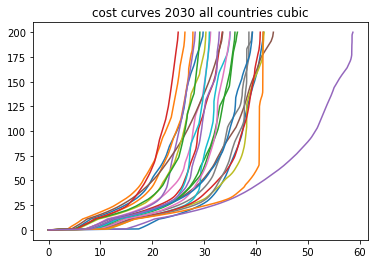

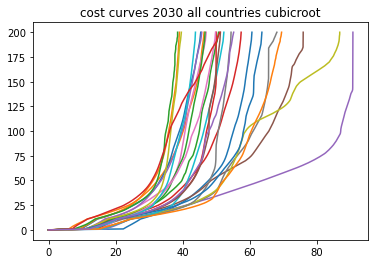

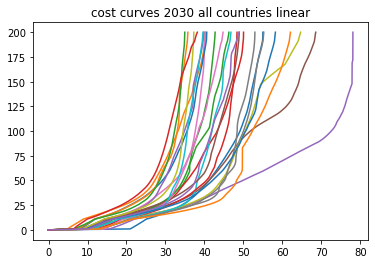

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_cubic = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_cubic.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubicroot = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_cubicroot.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_linear = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

def plot_curves(df, plot_title):
    
    year_index = []
    start_year = 2020

    for i in range (10, 90, 10):

        cur_year = start_year + i

        cur_index = df.index[df_cubicroot[1] == cur_year].tolist()

#         print(cur_index[0])

        year_index.append(cur_index[0])

    df_2030 = df[year_index[0]+1:year_index[1]]
    
    df_2030 = pd.DataFrame(df_2030)

    fig, ax = plt.subplots()

    for i in range(1, len(df.columns)):

        ax.plot(df_2030[i], range(0,201))

    ax.set(title='cost curves 2030 all countries ' + plot_title)
    
    
plot_curves(df_cubic, 'cubic')
plot_curves(df_cubicroot, 'cubicroot')
plot_curves(df_linear, 'linear')

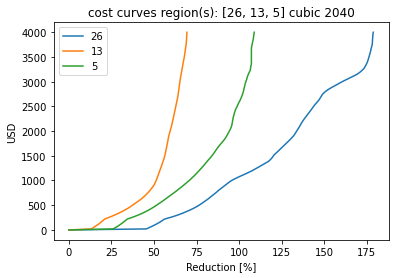

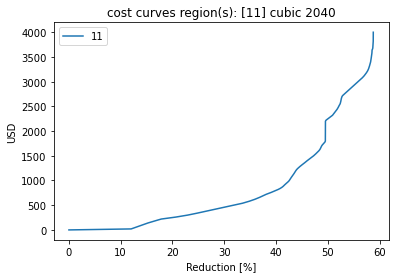

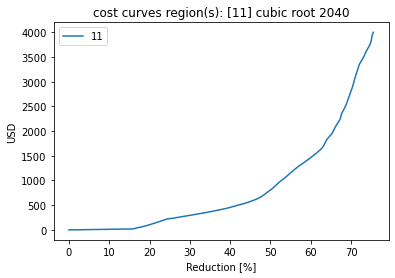

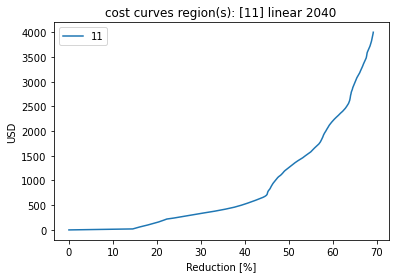

In [22]:
# df is the dataframe to be used (cubic, cubicroot, linear)
# plot_title, the title name (string)
# year which year should be plotted (int)
# regions is list like input ranging from 1:26 (int, list)

def plot_curves_year(df, plot_title, year, regions):
    
    year_index = []

    for i in range(0, 20, 10):
    
        cur_index = df.index[df_cubicroot[1] == year + i].tolist()

        year_index.append(cur_index[0])
            
    df_cur = df[year_index[0]+1:year_index[1]]
    
    df_cur = df_cur[regions]
    
    df_cur = pd.DataFrame(df_cur)

    fig, ax = plt.subplots()

    ax.plot(df_cur, range(0,4020,20))

    ax.set(title='cost curves region(s): ' + str(regions).strip() + ' ' + plot_title + ' ' + str(year))
    
    ax.set_ylabel('USD')
    
    ax.set_xlabel('Reduction [%]')
    
    ax.legend(df_cur.columns)
    
    return df_cur
    
df_2040 = plot_curves_year(df_cubic, 'cubic', 2040, [26,13,5])

df_world_1 = plot_curves_year(df_cubic, 'cubic', 2040, [11])
df_world_2 = plot_curves_year(df_cubicroot, 'cubic root', 2040, [11])
df_world_3 = plot_curves_year(df_linear, 'linear', 2040, [11])




In [8]:
df_linear

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
1812    152.7454
1813    152.7464
1814    152.7474
1815    152.7484
1816    152.7494
Name: 1, Length: 1817, dtype: float64